# Assignment 2
## Naive Bayes Classifier

## Student Details 

Venkata Sai Nitesh Adapa



# Naive Bayes-




## Importing required libraries.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.feature_selection import r_regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Any other relevant import for feature extraction

In [2]:
df = pd.read_csv("dataset_NB.csv")
df.head() #Displays top 5 columns of dataset.

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


## Approach
We selected tf-idf for preprocessing the data. Bag of words just considers the count of words, so it gives more value to the words that are more repeated. N-grams uses the context, in some of the e-mails there might not be a certain context, it might be full of symbols or something of that sort. This made us select tf-idf for our preprocessing.

## Preprocessing

### Tf-idf vectorization
Tf-idf considers both term frequency and inverse document frequency.<br>

Term Frequency(tf) of a word = (Word Count in document)/(No. of words in document)<br>
Inverse Document Frequency(idf) of a word = Log10((No. of documents in corpus)/(No. of documents in corpus that contain the word + 1))<br>

By taking the product of above both we are valueing both rare words and frequently encountered words.

tf-idf = tf * idf


In [3]:
# Preprocess
df.isna().sum() # Displays column wise null values. 

email    1
label    0
dtype: int64

We are dropping the rows that don't have an email content because we can't learn significant knowledge from those.

In [4]:
df.dropna(axis = 0, inplace = True) # Drops the rows that have null values.
df.isna().sum()

email    0
label    0
dtype: int64

We are preparing the corpus for tf-idf vectorization. We made a list of lowercased e-mails. We also made a list of labels.

In [5]:
s = []
label = []
for i in range(len(df)):
    try:
        label.append(df.at[i,'label'])
        s.append(df.at[i,'email'].lower())
    except:
        continue

We used TfidfVectorizer to transform the corpus to a matrix of tf-idf values. We have the number of rows as same as the number of emails we have, but the number of columns is transformed to the number of unique words in the corpus.

In [6]:
#Referred https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(s) # Transforms corpus into tf-idf matrix.
print(X.shape)
X.toarray()


(2998, 33941)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
df_prep = pd.DataFrame(data = X.toarray(), columns = vectorizer.get_feature_names_out()) # Creating a dataframe from tf-idf matrix, having the vocabulary as feature names.
df_prep.head()

,__,___,____,_____,______,_______,________,_________,__________,______________,...,해보자,허락없이,헤어디자이너,현재,호황을,홈쇼핑의,확실한,활황을,훨씬,힘입어
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Features = df_prep.columns
df_prep['label'] = label # Adding the list of labels to the current dataframe.

In [9]:
len(label) # Length of labels.

2998

### Train Test Split

We are splitting the data into 80% and 20% for training and testing respectively.

In [10]:
# train_test_split
# Referred https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X, y = df_prep[vectorizer.get_feature_names_out()], df_prep['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Referred https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) # Training Naive Bayes Classifier and predicting on test set.

### Metrics

In [12]:
print(metrics.classification_report(y_test, y_pred)) #Classification report.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00        96

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



We achieved an accuracy of 100%

In [13]:
metrics.accuracy_score(y_test, y_pred) # Accuracy Score

1.0

In [14]:
# Referred https://scikit-learn.org/stable/modules/cross_validation.html
cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=0) # Cross validation using Shuffle split.
cross_val_score(gnb, X, y, cv = cv)

array([1., 1., 1., 1., 1., 1., 1., 1.])

We tried checking the accuracy by cross validation with Shuffle split.

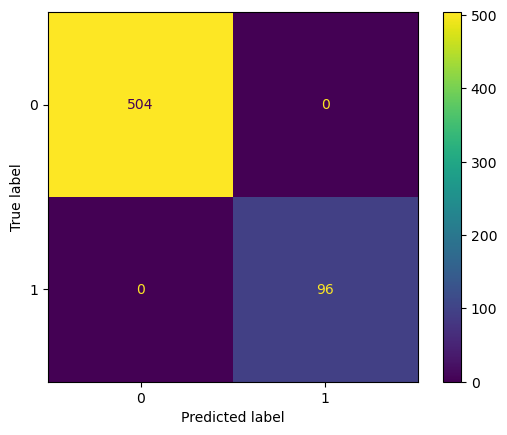

In [15]:
# Referred https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cnf = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cnf, display_labels = gnb.classes_)
disp.plot()

Since our classifier produced an accuracy of 100%, all the true positives are predicted as positives and all the true negatives are predicted as negatives.